<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Proyecto/ProyectoParcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos

Estos datos son el resultado de un estudio del NIST que involucra calibración ultrasónica. La variable de respuesta es la respuesta ultrasónica y la variable predictora es la distancia del metal.

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataChwirut.csv",delimiter = ',')
x=np.array(data['x'])
y=np.array(data["y"])

In [ ]:
x=(x-np.mean(x))/np.std(x)

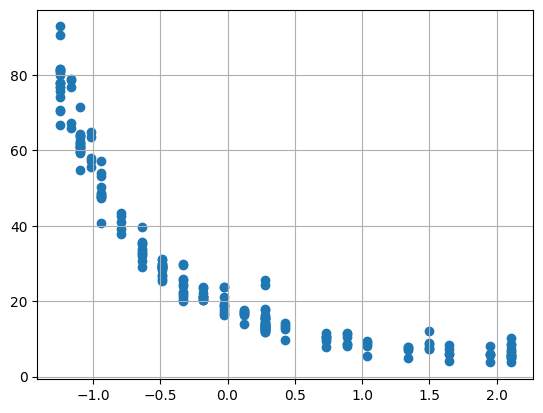

In [ ]:
plt.scatter(x,y)
plt.grid()

#Funcion

## modelo
$$y= f(x;\omega)$$
$$y=\frac{e^{-\omega_1 x}}{\omega_2+\omega_3 x}$$

In [ ]:
#modelo lienal
def model(x,theta):
  f = (np.exp(-theta[0]*x))/(theta[1]+theta[2]*x)
  return f

## Prior, Likelihood, MCMC

In [ ]:
#prior
def prior(lim,theta):
  if lim[0,1]> theta[0] >lim[0,0] and lim[1,1]> theta[1] >lim[1,0] and lim[2,1]> theta[2] >lim[2,0]:
    pr=1
  else:
    pr=0
  return pr

#likelihood
def likelihood(x,y,theta, model):
  lnL=0.0
  for i in range(len(x)):
    lnL += -0.5*(y[i]-model(x[i],theta))**2
  return lnL

#Monte Carlo Markov Chain Metropolis Algorithm
# Cadenas de Markov Algoritmo Metropolos
def CM_AM(x,y,theta,sigma,lim,iter,model):
  # distribucion de theta
  dist_theta=[]
  dist_theta.append(theta)
  for i in range(iter):
    theta_prop=[np.random.normal(theta[0],sigma[0]),np.random.normal(theta[1],sigma[1]),np.random.normal(theta[2],sigma[2])]
    lnPost_prop=likelihood(x,y,theta_prop,model)+ np.log(prior(lim,theta_prop))
    lnPost_ini=likelihood(x,y,theta,model)+ np.log(prior(lim,theta))
    if lim[0,1]> theta_prop[0] >lim[0,0] and lim[1,1]> theta_prop[1] >lim[1,0] and lim[2,1]> theta[2] >lim[2,0] :
      # lnPost= ln L + ln Pr
      if lnPost_prop > lnPost_ini:
        dist_theta.append(theta_prop)
        theta=theta_prop
        #print(f'postirios: {i}: theta{theta_prop} : prop={lnPost_prop} : ini={lnPost_ini}')
      elif lnPost_prop - lnPost_ini > np.log(np.random.uniform(0,1)):
        dist_theta.append(theta_prop)
        theta=theta_prop
        #print(f'postirios: {i}: theta{theta_prop} : prop={lnPost_prop} : ini={lnPost_ini}')


  return dist_theta

#Analisis prueba

##Prueba 1

In [ ]:
#Pesos
w0=0.0
w1=0.0
w2=0.0
w=[w0,w1,w2]

In [ ]:
#sigma
sigma0=0.1
sigma1=0.01
sigma2=0.1
#sigma3=0.003
sigma=[sigma0,sigma1,sigma2]

In [ ]:
#limites
lim= np.asmatrix([[-50,50],[-50,50],[-50,50]])

[ 1.4425546   0.05243203 -0.02242646]


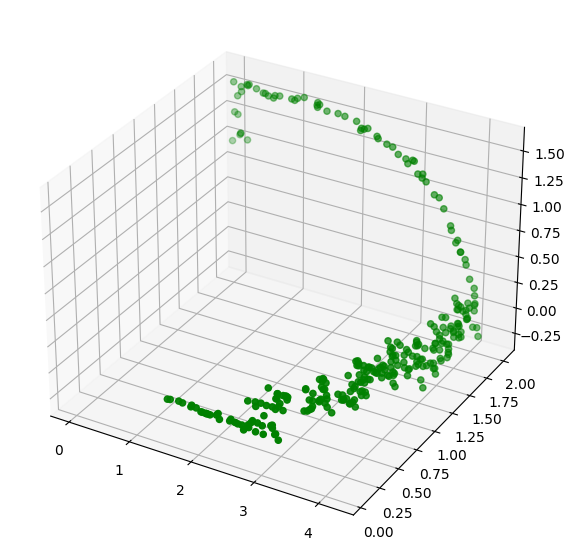

In [278]:
#iteracion
iter=10000
dis_theta=np.array(CM_AM(x,y,w,sigma,lim,iter,model))
print(dis_theta[-1])
# Creamos la figura
fig = plt.figure(figsize=(14,7))
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(dis_theta.T[0], dis_theta.T[1], dis_theta.T[2], c='g', marker='o')

##muestreo

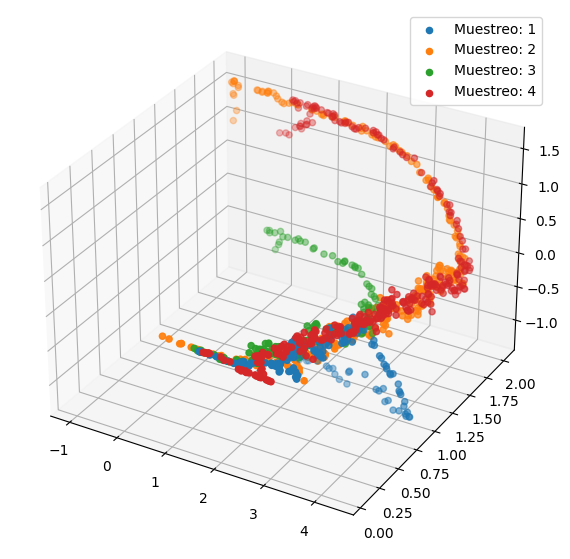

In [ ]:

theta=[[2,1,-1],[-1,2,1],[1.5,1,0.5],[0,2,1]]
#numero de muestreo
n=4
muestreo=[]
for i in range(n):
  w=theta[i]
  dis_theta=CM_AM(x,y,w,sigma,lim,iter,model)
  dis_theta=np.array(dis_theta).T
  #print(dis_theta)
  muestreo.append(dis_theta)

# Creamos la figura
fig = plt.figure(figsize=(14,7))
# Creamos el plano 3D
ax = fig.add_subplot(111, projection='3d')
for i in range(len(muestreo)):
  ax.scatter(muestreo[:][i][0],muestreo[:][i][1],muestreo[:][i][2],label=f'Muestreo: {i+1}')
plt.legend()
plt.grid()

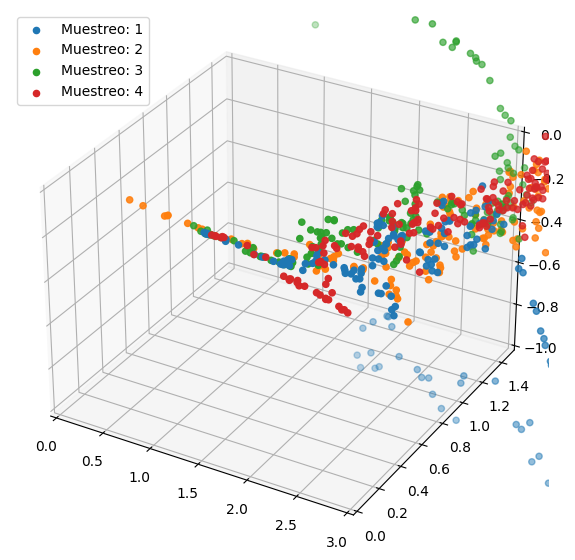

In [ ]:
# Creamos la figura
fig = plt.figure(figsize=(14,7))
# Creamos el plano 3D
ax = fig.add_subplot(111, projection='3d')
for i in range(len(muestreo)):
  ax.scatter(muestreo[:][i][0],muestreo[:][i][1],muestreo[:][i][2],label=f'Muestreo: {i+1}')
ax.set_xlim(0,3)
ax.set_ylim(0,1.5)
ax.set_zlim(-1,0)
plt.legend()
plt.grid()

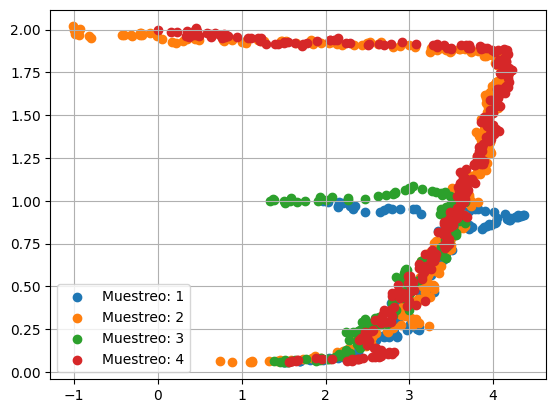

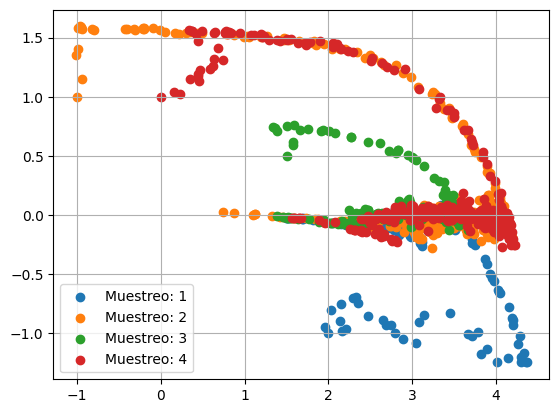

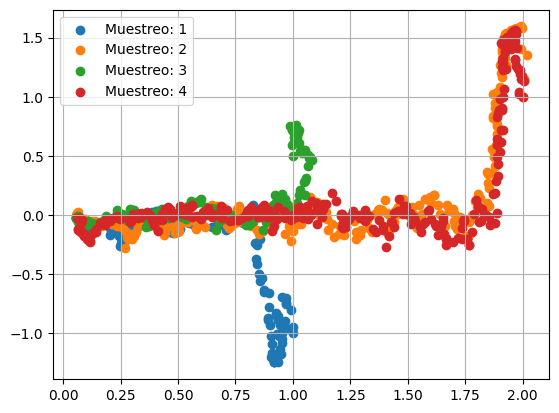

In [ ]:
for i in range(len(muestreo)):
  plt.scatter(muestreo[:][i][0],muestreo[:][i][1],label=f'Muestreo: {i+1}')
plt.legend()
plt.grid()
plt.show()
for i in range(len(muestreo)):
  plt.scatter(muestreo[:][i][0],muestreo[:][i][2],label=f'Muestreo: {i+1}')
plt.legend()
plt.grid()
plt.show()
for i in range(len(muestreo)):
  plt.scatter(muestreo[:][i][1],muestreo[:][i][2],label=f'Muestreo: {i+1}')
plt.legend()
plt.grid()
plt.show()

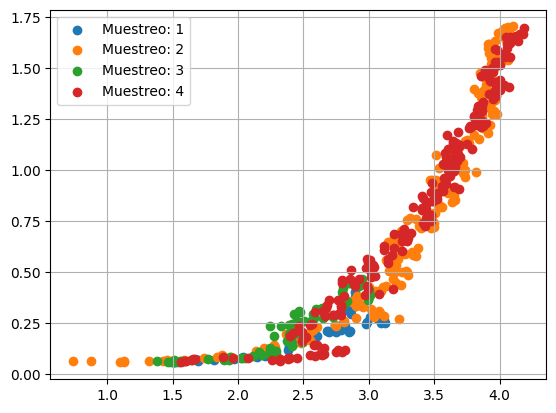

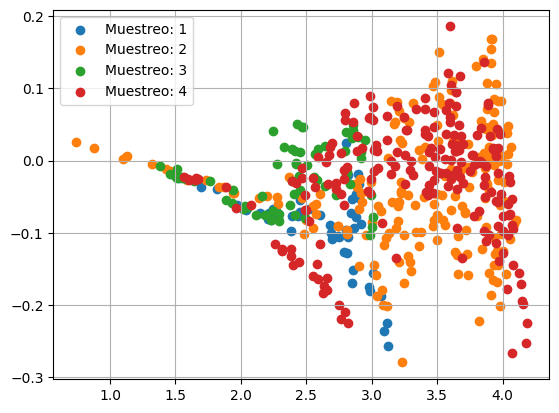

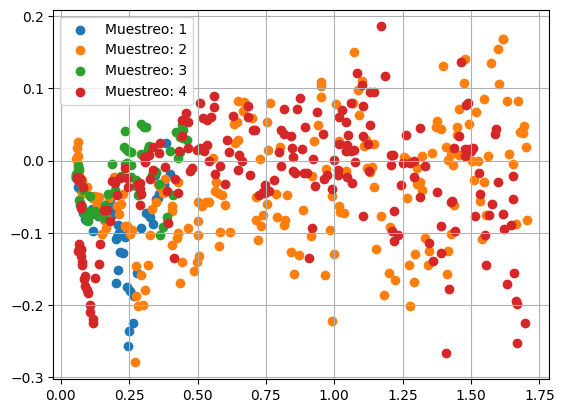

In [ ]:
for i in range(len(muestreo)):
  plt.scatter(muestreo[i][0][100:],muestreo[i][1][100:],label=f'Muestreo: {i+1}')
plt.legend()
plt.grid()
plt.show()
for i in range(len(muestreo)):
  plt.scatter(muestreo[i][0][100:],muestreo[i][2][100:],label=f'Muestreo: {i+1}')
plt.legend()
plt.grid()
plt.show()
for i in range(len(muestreo)):
  plt.scatter(muestreo[i][1][100:],muestreo[i][2][100:],label=f'Muestreo: {i+1}')
plt.legend()
plt.grid()
plt.show()

#Histograma

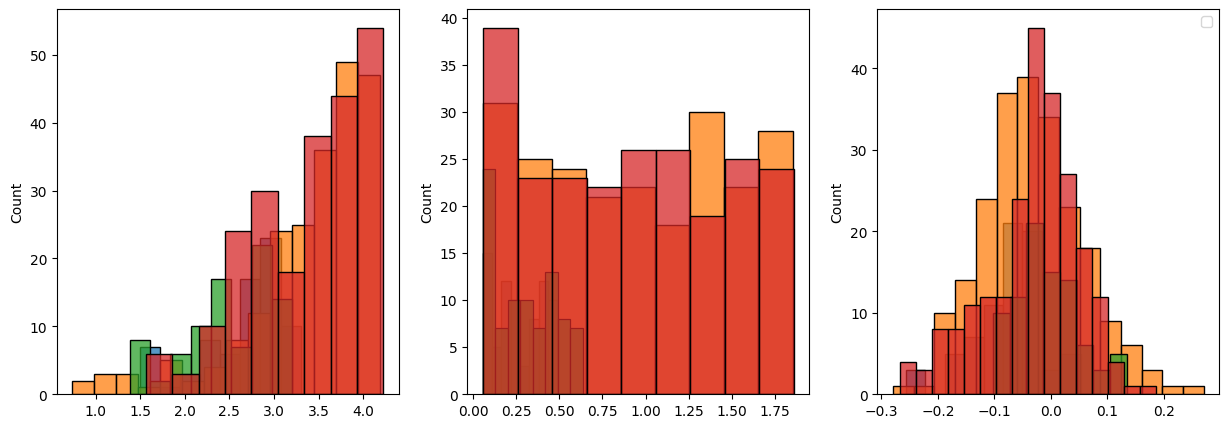

In [ ]:
fig, ax= plt.subplots(1,3, figsize=(15,5))
for i in range(3):
  for j in range(len(muestreo)):
    sns.histplot ( ax=ax[i] , x=muestreo[j][i][80:])
plt.legend()

In [312]:
test=[]
temp=[]
for i in muestreo:
  for j in i:
    temp.append(j[100:])
  test.append(temp)
  temp=[]
#test=np.array(test)

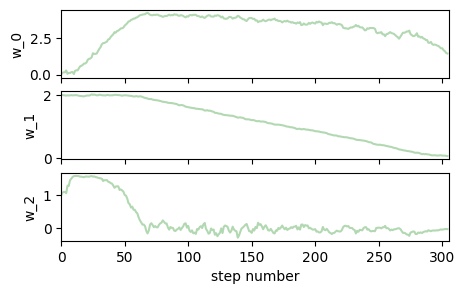

In [301]:
fig, axes = plt.subplots(3, figsize=(5, 3), sharex=True)
labels = ["w_0", "w_1", "w_2"]
for i in range(3):
    ax = axes[i]
    ax.plot(dis_theta[:,i], "g", alpha=0.3)
    ax.set_xlim(0, len(dis_theta))
    ax.set_ylabel(labels[i])
axes[-1].set_xlabel("step number");


In [ ]:
!pip install corner
import corner

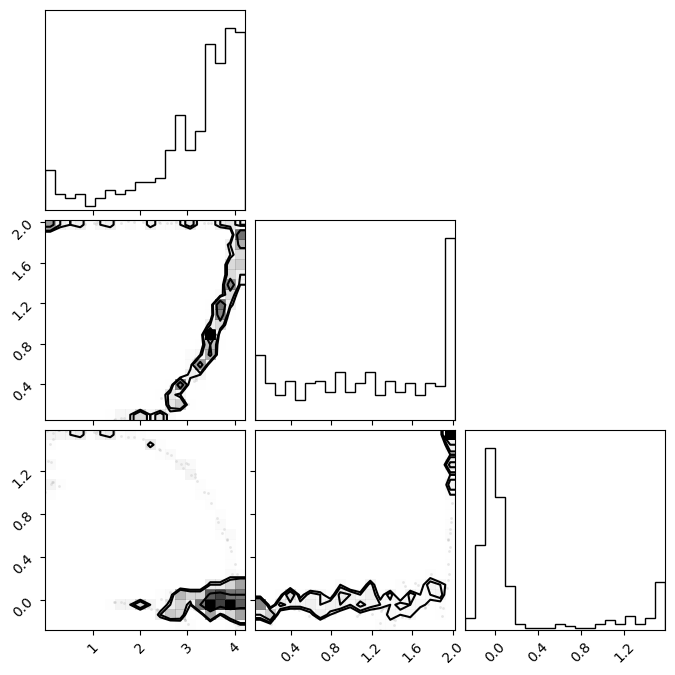

In [279]:
figure = corner.corner(dis_theta)

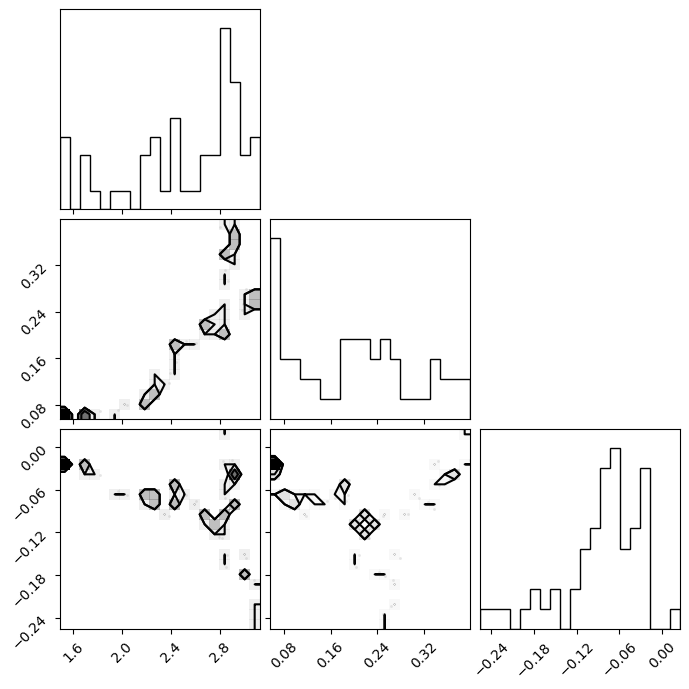

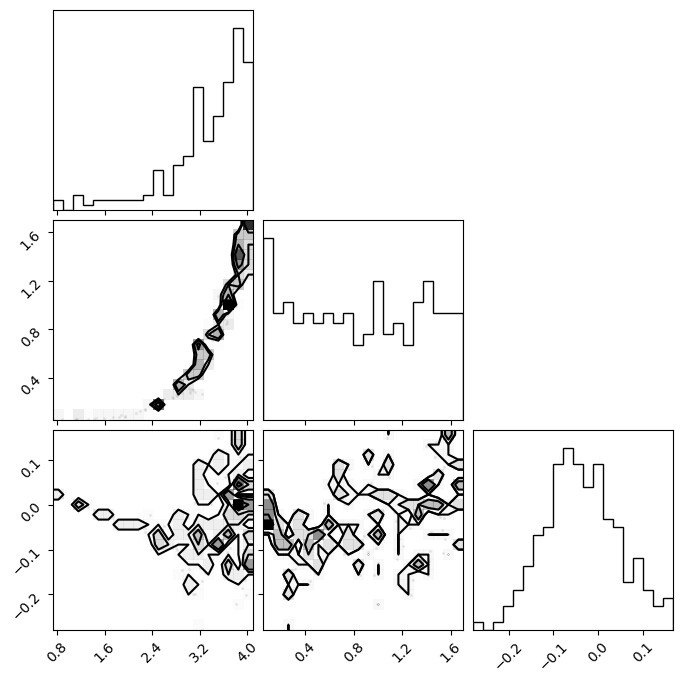

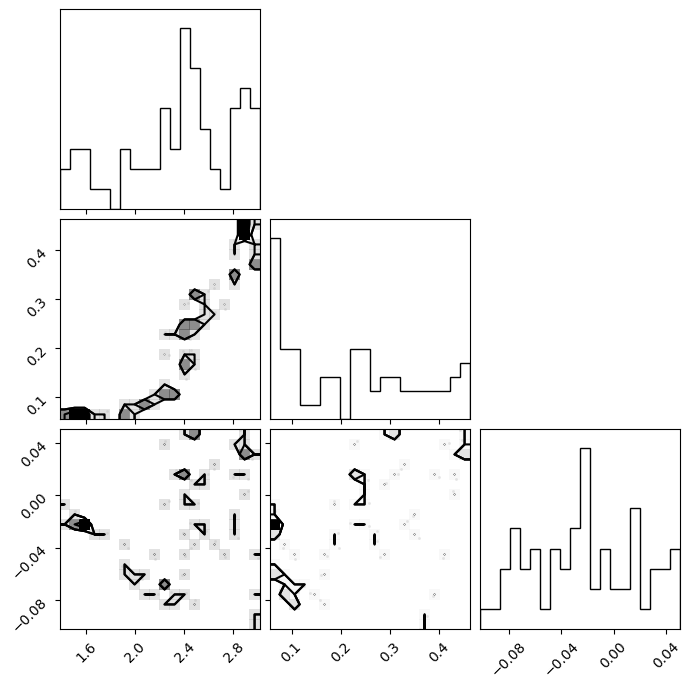

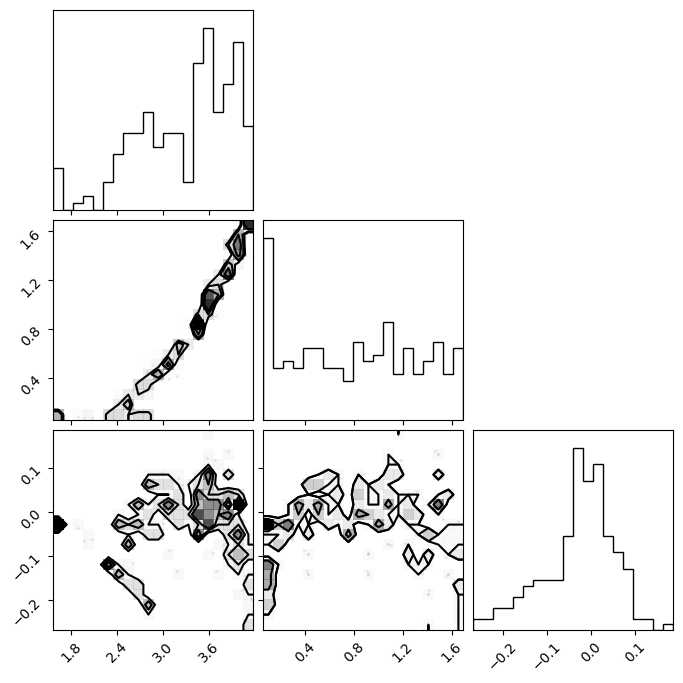

In [317]:
for i in range(4):
  figure = corner.corner(np.array(test[i]).T)

# Diagnostico de Gelman-Rubin

$S_{i}^2=\frac{1}{n-1}∑_{t=1}^n(X_{it}-\bar{X}_i)^2$

$S^2=\frac{1}{m}\sum_{i=1}^ms_i^2$

$\frac{B}{N}=\frac{1}{m-1}\sum_{i=1}^m(\bar{X}_i-\hat{\mu})^2$


In [ ]:
#ss
ss=0.0
for j in test:
  ss += np.sum((j[0]-np.mean(j[0]))**2)/(len(j[0])-1)
ss=ss*(1/len(muestreo))
print(f'ss        = {ss}')
#overall
overall=[]
for i in test:
  for j in i[0]:
    overall.append(j)
#len(overall)
#promedio
mean=[]
for i in test:
  mean.append(np.mean(i[0]))
print(f'Promedio  = {mean}')
#suma
Suma=0
for i in range(len(mean)):
  Suma += (mean[i]-np.mean(overall))**2
B_N=(1/(5-1))*Suma
print(f'B_N       = {B_N}')

ss        = 0.32261034082078127
Promedio  = [2.519089287559581, 3.340350348402155, 2.35664347634478, 3.29716489443271]
B_N       = 0.2537036964803576


In [ ]:
n=len(test[0][0])
sig=((n-1)/n)*ss+B_N
R=np.sqrt(sig/ss)
print(f'R = {R}')


R = 1.3297470612136224
